In [47]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

In [48]:
# Run command for helper functions
%run -i ./helpers/helper_functions.py

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.feature_selection import RFECV

import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import altair as alt
import altair_ally as aly

alt.data_transformers.enable("vegafusion")


DataTransformerRegistry.enable('vegafusion')

# Lab 4: Putting it all together in a mini project

For this lab, **you can choose to work alone of in a group of up to four students**. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one GitHub repo (you can create one on github.ubc.ca and set the visibility to "public"). If it takes a prohibitively long time to run any of the steps on your laptop, it is OK if you sample the data to reduce the runtime, just make sure you write a note about this.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

[TEAM BDFJ GitHub URL](https://github.ubc.ca/mds-2024-25/DSCI_573_Lab4_BDFJ)

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

#### Problem statement:
This project focuses on analyzing the **New York City Airbnb listings from 2019** dataset to predict the popularity of a listing. We aim to identify how factors such as location, property attributes, time of year, and host activity influence a listing's success. The goal is to help hosts better navigate the business by equipping them with a valuable tool to optimize their listings and attract potential renters.

#### Data:
The data contains 9 explanatory features and one target feature `reviews_per_month`, which will be used as a metric for a listing's popularity. Some observations for `reviews_per_month` are missing; however, those are linked to `number_of_reviews` having values of 0 and can be imputed. <br><br>
Listing popularity is likely to be dependent on the location, availability throughout the year, any restrictions (e.g. minimum nights, price) and properties of a listing (e.g. room type). Features that are less likely to contribute to the prediction model's learning are: `id`, `host_id` and `host_name` as these are unique and likely will not provide meaninglful patterns nor contribute to the model's good generalization. The `name` feature is also unique; however, there could be potentially useful features extracted from it, and will be explored in this project. <br><br>
Geographical features such as `neighbourhood_group`, `neighbourhood`, `lattitude` and `longtitude` should be examined for any high correlations, as these features may contribute the same amount of information to the model.<br><br>
Date feature `last_review` could be used to analyze seasonal patterns in the listing's popularity.

#### Models:
For this problem, we will explore Ridge Regression, Random Forest, LGBM, and Elastic Net regression models. By evaluating these models, we aim to balance interpretability, predictive performance, and computational efficiency.


In [50]:
data = pd.read_csv('./data/raw/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [51]:
# Checking if all null target values is because the number of reviews is 0
data[(data['number_of_reviews'] != 0) & (data['reviews_per_month'].isnull())]

# Fix target null values to be 0 when number of reviews is 0.
data['reviews_per_month'] = data['reviews_per_month'].apply(lambda x: 0 if pd.isna(x) else x)

train_df, test_df = train_test_split(data, random_state=573)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

1. .describe() method was called to obtain summary statistics from the data. Few notable observations:
- Mean `reviews_per_month`: An average of 1.086 reviews per month suggests limited interaction for most listings.
- `price` range, spanning from 0 to 10,000, reflects a diverse array of offerings, from extremely low-cost options to luxury accommodations. This wide range may contribute to a lower number of reviews, particularly for higher-priced listings.

2. Initial observations:
- The `last_review` feature has some missing values which should be imputed after feature engineering
- numeric featues and the target variables have a highly skewed distributions. Therefore, a 'median' strategy for imputation will be more appropriate than the mean, as it is less affected by outliers.
- The feature-feature correlations do not apprear to be high. Therefore, we will not drop the geographical features due to multicoliniarity, contrary to the intial concern. The target variable appears to be highly correlated with the `number_of_reviews` feature which intuitively makes sense.

3. To score the models, we will choose $R^2$, as it provides an interpretable result for assessing goodness of fit. Moreover, we will inlcude Root Mean Squared Error (RMSE) as it will provide a better measure of absolute accuracy of the predictions.

In [52]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4888,3495686,Lofted Murray Hill 1-bedroom w/ spiral staircase,721833,Joshua,Manhattan,Kips Bay,40.74593,-73.97915,Entire home/apt,184,3,0,NaN,0.00,1,0
42318,32843454,"Cute, Vintage Studio on UES Close to Express Q",247072396,Andrea,Manhattan,Upper East Side,40.77085,-73.94933,Entire home/apt,250,2,1,2019-04-21,0.38,1,0
30859,23896110,Charming one bedroom / West village,175315624,Shelby,Manhattan,West Village,40.73170,-74.00708,Entire home/apt,163,7,7,2018-07-18,0.48,1,0
38670,30379843,"Your NY home for Quality time , Fully Equipped !",148725429,Javier,Brooklyn,Bushwick,40.69231,-73.92567,Entire home/apt,90,3,58,2019-07-07,7.91,2,2
40083,31119351,Beautiful Brooklyn Home,2557889,Serena,Brooklyn,Bushwick,40.70267,-73.92751,Private room,55,2,16,2019-05-13,2.57,1,2


In [53]:
train_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.667100e+04,3.667100e+04,36671.000000,36671.000000,36671.000000,36671.000000,36671.000000,36671.000000,36671.000000,36671.000000
mean,1.901858e+07,6.753485e+07,40.728871,-73.952174,153.009408,7.017398,23.086990,1.086294,7.155109,112.255897
std,1.099541e+07,7.862213e+07,0.054648,0.046113,247.269517,20.734663,44.304601,1.593990,33.242306,131.558583
min,3.647000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.453066e+06,7.848642e+06,40.689930,-73.983090,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.968643e+07,3.091859e+07,40.722830,-73.955680,105.000000,2.000000,5.000000,0.370000,1.000000,44.000000
75%,2.917369e+07,1.074344e+08,40.763125,-73.936160,175.000000,5.000000,23.000000,1.570000,2.000000,225.000000
max,3.648543e+07,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36671 entries, 4888 to 9822
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36671 non-null  int64  
 1   name                            36658 non-null  object 
 2   host_id                         36671 non-null  int64  
 3   host_name                       36656 non-null  object 
 4   neighbourhood_group             36671 non-null  object 
 5   neighbourhood                   36671 non-null  object 
 6   latitude                        36671 non-null  float64
 7   longitude                       36671 non-null  float64
 8   room_type                       36671 non-null  object 
 9   price                           36671 non-null  int64  
 10  minimum_nights                  36671 non-null  int64  
 11  number_of_reviews               36671 non-null  int64  
 12  last_review                     291

In [55]:
col_list = ['price','availability_365','number_of_reviews','minimum_nights']

chart = alt.Chart(data).mark_bar().encode(
    x=alt.X(alt.repeat('column')).bin(),
    y='count()'
).repeat(
    column=col_list
)
chart

alt.RepeatChart(...)

In [56]:
aly.corr(train_df)

alt.ConcatChart(...)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

**We wil introduce two new features:**
1. Vader sentiment analysis on the name of the listings. Motivation: listings with positive or engaging titles may attract more guests, and hence more reviews, while negative sentiments might deter potential renters.
2. Month of the listing from `last_review`. Motivation: the month information can help identify any seasonal patterns in the listing's popularity, as certain months may see higher booking rates, which can lead to more reviews.

In [57]:
nltk.download('vader_lexicon')
nltk.download('punkt')

sid = SentimentIntensityAnalyzer()

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36671 entries, 4888 to 9822
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36671 non-null  int64  
 1   name                            36658 non-null  object 
 2   host_id                         36671 non-null  int64  
 3   host_name                       36656 non-null  object 
 4   neighbourhood_group             36671 non-null  object 
 5   neighbourhood                   36671 non-null  object 
 6   latitude                        36671 non-null  float64
 7   longitude                       36671 non-null  float64
 8   room_type                       36671 non-null  object 
 9   price                           36671 non-null  int64  
 10  minimum_nights                  36671 non-null  int64  
 11  number_of_reviews               36671 non-null  int64  
 12  last_review                     291

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/daria/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/daria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
# Add polarity score data column
train_df['name_polarity_scores'] = train_df['name'].apply(lambda x: None if pd.isna(x) else sid.polarity_scores(x)['compound'])
test_df['name_polarity_scores'] = test_df['name'].apply(lambda x: None if pd.isna(x) else sid.polarity_scores(x)['compound'])

In [59]:
train_df['month_of_last_review'] = train_df['last_review'].apply(lambda x: x if pd.isna(x) else x.split('-')[1])
num_to_month_map = {
    '01': "January", '02': "February", '03': "March", '04': "April",
    '05': "May", '06': "June", '07': "July", '08': "August",
    '09': "September", '10': "October", '11': "November", '12': "December"
}

train_df['month_of_last_review'] = train_df['month_of_last_review'].apply((lambda x: x if pd.isna(x) else num_to_month_map[x]))

In [60]:
test_df['month_of_last_review'] = test_df['last_review'].apply(lambda x: x if pd.isna(x) else x.split('-')[1])
test_df['month_of_last_review'] = test_df['month_of_last_review'].apply((lambda x: x if pd.isna(x) else num_to_month_map[x]))

In [61]:
train_df['count_hostID'] = train_df.groupby('host_id')['host_id'].transform('count')
test_df['count_hostID'] = test_df.groupby('host_id')['host_id'].transform('count')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

In [62]:
X_train = train_df.drop(columns='reviews_per_month')
y_train = train_df['reviews_per_month']
X_test = test_df.drop(columns='reviews_per_month')
y_test = test_df['reviews_per_month']

In [63]:
categorical_features = ['neighbourhood_group', 'room_type',]
numeric_features = ['latitude', 
                'longitude', 
                'minimum_nights', 
                'number_of_reviews', 
                'calculated_host_listings_count', 
                'availability_365'
                ]
drop_features = ['id', 'host_id', 'host_name', 'name', 'neighbourhood']

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
)

numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
)

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features)
)

In [64]:
preprocessor.fit(X_train) 

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['latitude', 'longitude', 'minimum_nights',
                                  'number_of_reviews',
                                  'calculated_host_listings_count',
                                  'availability_365']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['neighbourhood_group', 'room_type']),
                                ('drop', 'drop',
                                 ['id', 'host_id', 'host_name', 'name',
                                  'neighbourhood'])])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

In [65]:
dummy = DummyRegressor()
scoring_metric = {
    "R2": "r2",
    "Neg RMSE": "neg_root_mean_squared_error",
}
results = {}

results["Dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
results["Dummy"]


fit_time           0.003 (+/- 0.001)
score_time         0.001 (+/- 0.000)
test_R2           -0.000 (+/- 0.000)
train_R2           0.000 (+/- 0.000)
test_Neg RMSE     -1.593 (+/- 0.065)
train_Neg RMSE    -1.594 (+/- 0.017)
dtype: object

The dummy model shows poor performance, as expected, indicating that predicting the average value of the target variable `reviews_per_month` (1.09) for all observations does not capture the complexity of the problem.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

We will start by exploring the Ridge model. To optimize its performance, we will use RidgeCV, which automatically tunes the regularization hyperparameter (alpha) using cross-validation. This process allows us to dynamically identify the best alpha within overall cross-validation.<br>

The cross validation results show an improved $R^2$ score of 0.56,  which indicates that the model is able to explain about 56% of the variance in the target variable. While this is an improvement over the dummy model, the model's performance is still just adequate, and needs further improvemnet. 

Additionally, the Root Mean Squared Error (RMSE) is 1.05, meaning the model’s predictions deviate, on average, by about 1.05 reviews per month from the actual values. Considering that the average `reviews_per_month` is 1.08, this indicates notable discrepancies between the predicted and actual values. 

See cross validation results below.

In [66]:
alpha_vals =  np.logspace(-8, 8, 10)

ridge = make_pipeline(
    preprocessor,
    PolynomialFeatures(degree=2),
    RidgeCV(alphas = alpha_vals, cv=10)
)

results["RidgeCV"] = mean_std_cross_val_scores(
    ridge, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
results["RidgeCV"]

fit_time           3.092 (+/- 0.180)
score_time         0.009 (+/- 0.001)
test_R2            0.438 (+/- 0.029)
train_R2           0.449 (+/- 0.007)
test_Neg RMSE     -1.194 (+/- 0.075)
train_Neg RMSE    -1.183 (+/- 0.019)
dtype: object

In [67]:
...

Ellipsis

In [68]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

#### LGBM Regressor
The cross-validation results show a strong $R^2$ score of 0.66. This is a significant improvement over the Ridge model, demonstrating the LGBM model's ability to capture more complex relationships within the data. The RMSE shows the model's predictions deviate by approximately 0.932 reviews per month on average. We see a slightly better score in the training data, indicating potential overfitting.

#### Random Forest
The cross-validation results show a strong $R^2$ score of 0.64. While this is a strong result, it still lags behind the LGBM model, suggesting that Random Forest may not capture as much of the underlying structure in the data. The RMSE score is 0.95, which is similar to the LGBM metric. There is a significant amount of overfitting, which indicates that the the Random Forest model does not generalize well. Moreover, this is the most computationally expensive model out of the three.

#### Elastic Net
The cross-validation results show a strong $R^2$ score of 0.56. This model perfoms worse than LGBM and Random Forest, but better than Ridge. The RMSE score is 1.06, which is similar to the other models. Similar to Ridge, Elastic Net does not show signs of ovarefitting.


In [69]:
# LGBM
from lightgbm.sklearn import LGBMRegressor
pipe_lgbm = make_pipeline(
    preprocessor,
    LGBMRegressor(
        n_jobs=-1,
        random_state=573
    )
)

results['lgbm'] = mean_std_cross_val_scores(
    pipe_lgbm, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 29336, number of used features: 14
[LightGBM] [Info] Start training from score 1.086381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 29337, number of used features: 14
[LightGBM] [Info] Start training from score 1.086454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bi

In [70]:
# Random Forest
# Code adapted from Lecture 7: https://pages.github.ubc.ca/mds-2024-25/DSCI_573_feat-model-select_students/lectures/07_ensembles.html#random-forests
from sklearn.ensemble import RandomForestRegressor

pipe_rf = make_pipeline(
    preprocessor,
    RandomForestRegressor(
        n_jobs=-1,
        random_state=573,
    )
)

results["random_forests"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score=True, scoring=scoring_metric
)


In [71]:
# ElasticNet
from sklearn.linear_model import ElasticNetCV
# 1. Setup the ElasticNet Pipeline
elastic = make_pipeline(
    preprocessor,
    ElasticNetCV(max_iter=20_000, tol=0.01, cv=10)
)

# 2. Cross-validation
results['elastic_net'] = mean_std_cross_val_scores(
    elastic, X_train, y_train, return_train_score=True, scoring=scoring_metric, cv=10
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward/backward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

Feature selection does not seem to improve the test score; however, it does improve the degree of overfitting, making it the model a better generalizer.

In [72]:
# Make the rfecv pipeline
pipe_rfe_ridgecv = make_pipeline(
    preprocessor,
    RFECV(Ridge(), cv=10, n_jobs=-1), 
    RidgeCV()
)


# Get the cv scores
results['rfe_ridgecv'] = mean_std_cross_val_scores(
    pipe_rfe_ridgecv, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [73]:
pd.DataFrame(results).T

,fit_time,score_time,test_R2,train_R2,test_Neg RMSE,train_Neg RMSE
Dummy,0.003 (+/- 0.001),0.001 (+/- 0.000),-0.000 (+/- 0.000),0.000 (+/- 0.000),-1.593 (+/- 0.065),-1.594 (+/- 0.017)
RidgeCV,3.092 (+/- 0.180),0.009 (+/- 0.001),0.438 (+/- 0.029),0.449 (+/- 0.007),-1.194 (+/- 0.075),-1.183 (+/- 0.019)
lgbm,0.445 (+/- 0.019),0.014 (+/- 0.002),0.597 (+/- 0.037),0.676 (+/- 0.006),-1.012 (+/- 0.086),-0.907 (+/- 0.017)
random_forests,1.675 (+/- 0.143),0.040 (+/- 0.006),0.580 (+/- 0.036),0.940 (+/- 0.002),-1.033 (+/- 0.086),-0.389 (+/- 0.011)
elastic_net,0.252 (+/- 0.018),0.004 (+/- 0.001),0.370 (+/- 0.035),0.368 (+/- 0.004),-1.264 (+/- 0.109),-1.267 (+/- 0.013)
rfe_ridgecv,0.978 (+/- 1.623),0.008 (+/- 0.003),0.369 (+/- 0.031),0.368 (+/- 0.008),-1.266 (+/- 0.078),-1.267 (+/- 0.020)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods.  Briefly summarize your results.
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

We performed hyperparameter optimization on Ridge, LGBTM, Random Forest and Elastic Net models using RandomizesSearchCV method of sklearn. Below is the summary of results:<br><br>
**Ridge:** Optimized the alpha hyperparameter. Best $\alpha = 21.6$, with $R^2$ score being 0.36, which is worse than the linear model from section 7.<br>
**LGBM:** Optimized learning_rate, max_depth and n_estimators hyperparameters. Best values are 200, 10 and 0.1 respectively, with $R^2$ score of 0.60, which is similar to the initial model in section 8. <br>
**Random Forest:** Optimized max_depth and n_estimators hyperparameters. Best values are 500 and 14 respectively, with $R^2$ score of 0.59 which is also similar to the initial model. <br>
**Elastic Net:** Optimimized L1 ratio and alpha hyperparameters. Best values are 0.1 and all alphas chosen that were passed. The new $R^2$ is 0.59, which is considerably better than the base model in section 8.<br>

In [74]:
from scipy.stats import loguniform
param_dist_ridge = {"ridgecv__alphas": loguniform(1e-5, 1e5)}

random_ridge_pipe = make_pipeline(
    preprocessor,
    # RFECV(Ridge(), cv=10, n_jobs=-1),
    RidgeCV()
)

random_ridge_search = RandomizedSearchCV(
    random_ridge_pipe,
    param_distributions=param_dist_ridge, 
    n_iter=250,
    n_jobs=-1,
    random_state=573,
    return_train_score=True,
    scoring=scoring_metric, 
    refit='R2'
)

In [75]:
random_ridge_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'calculated_host_listings_count',
                                                                                'availability_365']),
                                                                              ('pipeline-2',
                                                                               Pipe...
                                                                                'room_type']),
                                                                              ('drop',
                                                                               'drop',
                                                                               ['id',
                                                                                'host_id',
                                                                                'host_name',
                                                                                'name',
                                                                                'neighbourhood'])])),
                                             ('ridgecv', RidgeCV())]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'ridgecv__alphas': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x164e63010>},
                   random_state=573, refit='R2', return_train_score=True,
                   scoring={'Neg RMSE': 'neg_root_mean_squared_error',
                            'R2': 'r2'})

In [76]:
random_ridge_search.best_params_

{'ridgecv__alphas': 21.62854325581581}

In [77]:
opti_results = {}

opti_results['ridge'] = random_ridge_search.best_score_

In [78]:
pipe_lgbm_reduced = make_pipeline(
    preprocessor,
    LGBMRegressor(
        n_jobs=-1,
        random_state=573
    )
)

param_grid_lgbm =  {
    "lgbmregressor__learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
    "lgbmregressor__max_depth": [10,50,100],
    "lgbmregressor__n_estimators": [100,150,200]
}

In [79]:
random_lgbm_search = RandomizedSearchCV(
    pipe_lgbm_reduced,
    param_distributions=param_grid_lgbm,
    n_iter=50,
    n_jobs=-1,
    return_train_score=True,
    scoring=scoring_metric,
    refit='R2'
)

In [80]:
random_lgbm_search.fit(X_train, y_train)

/Users/daria/miniforge3/envs/573/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 45 is smaller than n_iter=50. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1140
[LightGBM] [Info] Number of data points in the train set: 29337, number of used features: 14
[LightGBM] [Info] Start training from score 1.088227
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 29336, number of used features: 14
[LightGBM] [Info] Start training from score 1.086381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 29337, number of used features: 14
[LightGBM] [Info] Auto-choo

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'calculated_host_listings_count',
                                                                                'availability_365']),
                                                                              ('pipeline-2',
                                                                               Pipe...
                                                                                'neighbourhood'])])),
                                             ('lgbmregressor',
                                              LGBMRegressor(n_jobs=-1,
                                                            random_state=573))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'lgbmregressor__learning_rate': [0.01,
                                                                         0.05,
                                                                         0.1,
                                                                         0.15,
                                                                         0.2],
                                        'lgbmregressor__max_depth': [10, 50,
                                                                     100],
                                        'lgbmregressor__n_estimators': [100,
                                                                        150,
                                                                        200]},
                   refit='R2', return_train_score=True,
                   scoring={'Neg RMSE': 'neg_root_mean_squared_error',
                            'R2': 'r2'})

In [81]:
random_lgbm_search.best_params_

{'lgbmregressor__n_estimators': 200,
 'lgbmregressor__max_depth': 10,
 'lgbmregressor__learning_rate': 0.1}

In [82]:
opti_results['lgbm'] = random_lgbm_search.best_score_

In [83]:
# Random Forest Regresser Optimization
pipe_rf_reduced = make_pipeline(
    preprocessor,
    RandomForestRegressor(
        n_jobs=-1,
        random_state=573,
    )
)

param_grid_rf = {
    "randomforestregressor__max_depth": np.linspace(2, 20, 10, dtype=int),
    "randomforestregressor__n_estimators": np.linspace(10, 500, 20, dtype=int)
}


random_rf_search = RandomizedSearchCV(
    pipe_rf_reduced,                                    
    param_distributions = param_grid_rf,
    n_iter=50,
    random_state=573,
    return_train_score=True,
    scoring=scoring_metric, 
    refit='R2'
)

In [84]:
random_rf_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'calculated_host_listings_count',
                                                                                'availability_365']),
                                                                              ('pipeline-2',
                                                                               Pipe...
                                                                    random_state=573))]),
                   n_iter=50,
                   param_distributions={'randomforestregressor__max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'randomforestregressor__n_estimators': array([ 10,  35,  61,  87, 113, 138, 164, 190, 216, 242, 267, 293, 319,
       345, 371, 396, 422, 448, 474, 500])},
                   random_state=573, refit='R2', return_train_score=True,
                   scoring={'Neg RMSE': 'neg_root_mean_squared_error',
                            'R2': 'r2'})

In [85]:
random_rf_search.best_params_

{'randomforestregressor__n_estimators': 500,
 'randomforestregressor__max_depth': 14}

In [86]:
opti_results['rf'] = random_rf_search.best_score_

In [87]:
import pickle
with open('./models/ridge_random.pickle', 'wb') as file:
    pickle.dump(random_ridge_search, file)

with open('./models/lgbm_random.pickle', 'wb') as file:
    pickle.dump(random_lgbm_search, file)

with open('./models/rf_random.pickle', 'wb') as file:
    pickle.dump(random_rf_search, file)
    

FileNotFoundError: [Errno 2] No such file or directory: './models/ridge_random.pickle'

In [88]:
# Elastic Net Optimization
pipe_elasticnet_reduced = make_pipeline(
    preprocessor,
    ElasticNetCV(max_iter=20_000, tol=0.01, cv=5)
)

param_grid_elastic = {
    "elasticnetcv__l1_ratio": np.linspace(0.1, 1.0, 10),
    "elasticnetcv__alphas": [[0.1, 1.0, 10.0, 100.0]],
}

random_en_search = RandomizedSearchCV(
    pipe_elasticnet_reduced, 
    param_distributions=param_grid_elastic,
    n_iter=500,
    verbose=1,
    n_jobs=-1,
    random_state=573,
    return_train_score=True,
    scoring='r2',
    refit='r2'
)

In [89]:
random_en_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/daria/miniforge3/envs/573/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 10 is smaller than n_iter=500. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'calculated_host_listings_count',
                                                                                'availability_365']),
                                                                              ('pipeline-2',
                                                                               Pipe...
                                                                               ['id',
                                                                                'host_id',
                                                                                'host_name',
                                                                                'name',
                                                                                'neighbourhood'])])),
                                             ('elasticnetcv',
                                              ElasticNetCV(cv=5, max_iter=20000,
                                                           tol=0.01))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'elasticnetcv__alphas': [[0.1, 1.0,
                                                                  10.0,
                                                                  100.0]],
                                        'elasticnetcv__l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=573, refit='r2', return_train_score=True,
                   scoring='r2', verbose=1)

In [90]:
random_en_search.best_params_

{'elasticnetcv__l1_ratio': 0.1,
 'elasticnetcv__alphas': [0.1, 1.0, 10.0, 100.0]}

In [91]:
opti_results['elastic_net'] = random_rf_search.best_score_

In [92]:
pd.DataFrame(opti_results, index=['Validation Test Score (R2)'])

,ridge,lgbm,rf,elastic_net
Validation Test Score (R2),0.368546,0.59996,0.58662,0.58662


In [93]:
with open('./models/random_en_search.pickle', 'wb') as file:
    pickle.dump(random_en_search, file)
    

FileNotFoundError: [Errno 2] No such file or directory: './models/random_en_search.pickle'

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `permutation_importance` or `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

In [94]:
import pickle 
with open('../models/lgbm_random.pickle', 'rb') as f:
    random_lgbm_search = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../models/lgbm_random.pickle'

Permutation importance evaluates the significance of a feature by measuring the impact on model performance when its values are randomly shuffled. If shuffling a feature significantly reduces the model's accuracy, it indicates high importance. Conversely, minimal change suggests low importance.

For our **LGBM** model, the features with the highest permutation importance are:
- `number_of_reviews`
- `month_of_last_review_July`
- `month_of_last_review_June`
- `minimum_nights`
- `availability_365`
- `calculated_host_listings_count`
- `latitude` and `longitude`

These results align intuitively. Location, listing availability, and the duration of a guest's stay likely influence their experience and review. The prominence of June and July also makes sense, as summer months typically see higher Airbnb activity.

However, it’s important to note that permutation importance reflects the model's internal understanding of features and may not directly represent their real-world causal relationships.

In [95]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import pandas as pd

# def get_permutation_importance(model):
#     # X_train_perm = X_train.drop(columns=["race", "education.num", "fnlwgt"])
#     result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=123)
#     perm_sorted_idx = result.importances_mean.argsort()
#     plt.boxplot(
#         result.importances[perm_sorted_idx].T,
#         vert=False,
#         tick_labels=X_train.columns[perm_sorted_idx],
#     )
#     plt.xlabel('Permutation feature importance')
#     plt.show()

def get_permutation_importance(pipe):
    X_train_transformed = pipe[:-1].transform(X_train)
    feature_names = pipe[:-1].get_feature_names_out()
    
    result = permutation_importance(
        pipe[-1],  # Final model in the pipeline
        X_train_transformed,
        y_train,
        n_repeats=10,
        random_state=123,
        n_jobs=-1
    )
    
    perm_sorted_idx = result.importances_mean.argsort()
    
    # Plot permutation importance
    plt.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=[feature_names[i] for i in perm_sorted_idx],  # Use transformed feature names
    )
    plt.xlabel('Permutation feature importance')
    plt.show()


/var/folders/q2/9_rvc75s2yzgcz5xzfh1tm9w0000gn/T/ipykernel_23630/4010980674.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


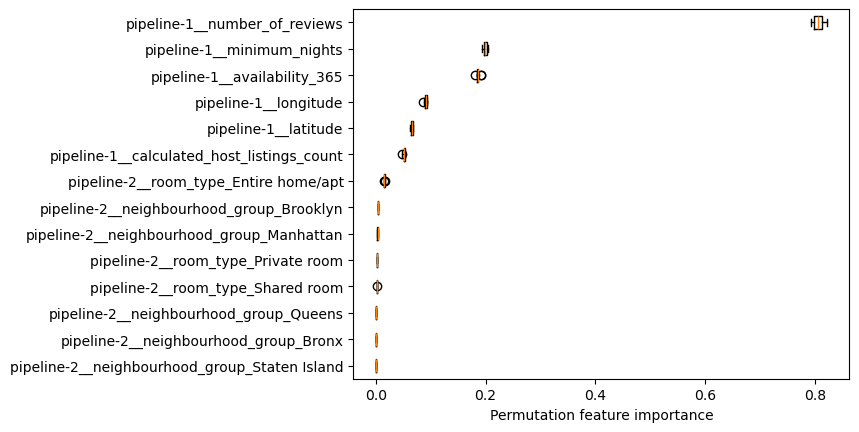

In [96]:
get_permutation_importance(random_lgbm_search.best_estimator_)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

___
CHECKING PERFORMANCE ON TEST SET
___

In [118]:
from sklearn.metrics import mean_squared_error, r2_score

best_pipeline = random_lgbm_search.best_estimator_

y_pred = best_pipeline.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.9637
R-squared (R²): 0.6268


___
COMPARING TEST SCORE AND CV SCORE
___

The mean cross-validation (CV) score for our best LGBM model was 0.6654, and the test score is 0.7010, which is very close. This consistency indicates that the model's performance on unseen data aligns well with its performance during cross-validation.

___
SHAP
___

In [98]:
import shap
shap.initjs()
%matplotlib inline

In [99]:
X_test_transformed = random_lgbm_search.best_estimator_[:-1].transform(X_test)
feature_names = random_lgbm_search.best_estimator_[:-1].get_feature_names_out()

X_test_enc = pd.DataFrame(
    data=X_test_transformed,
    columns=feature_names,
    index=X_test.index,
)

X_test_enc.columns = X_test_enc.columns.str.split('__').str[1]

In [100]:
y_test_reset = y_test.reset_index(drop=True)

In [101]:
lgbm_explainer = shap.TreeExplainer(
    random_lgbm_search.best_estimator_.named_steps['lgbmregressor'],
)
lgbm_explanation = lgbm_explainer(X_test_enc)

In [102]:
avg_rev_g_2_75_ind = y_test_reset[y_test_reset > 2.75].index.tolist()
avg_rev_l_5_ind = y_test_reset[y_test_reset < 5 ].index.tolist()

ex_g3_index = avg_rev_g_2_75_ind[2]
ex_l5_index = avg_rev_l_5_ind[2]

In [103]:
shap.plots.force(lgbm_explanation[ex_g3_index, :])

For this prediction (`reviews_per_month` = 2.31), features such as `availability_365` (-0.6253) and `month_of_last_review` (1) is pushing the model towaws a higher prediciton while feaures like `minimum_nights` (0.1938) and  `month_of_last_review` is pushing the model towards a lower prediction value.

In [104]:
shap.plots.force(lgbm_explanation[ex_l5_index, :])

For this prediction (`reviews_per_month` = -0.01), very few features are pushing the model towards a higher prediction. Features such as `number_of_reviews` (-0.5211), `minimum_nights` (-0.04907) and  `month_of_last_review_June` (0) is pushing the model towards a lower prediction value.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

### Summary tables

In [111]:
pd.DataFrame(results)

,Dummy,RidgeCV,lgbm,random_forests,elastic_net,rfe_ridgecv
fit_time,0.003 (+/- 0.001),3.092 (+/- 0.180),0.445 (+/- 0.019),1.675 (+/- 0.143),0.252 (+/- 0.018),0.978 (+/- 1.623)
score_time,0.001 (+/- 0.000),0.009 (+/- 0.001),0.014 (+/- 0.002),0.040 (+/- 0.006),0.004 (+/- 0.001),0.008 (+/- 0.003)
test_R2,-0.000 (+/- 0.000),0.438 (+/- 0.029),0.597 (+/- 0.037),0.580 (+/- 0.036),0.370 (+/- 0.035),0.369 (+/- 0.031)
train_R2,0.000 (+/- 0.000),0.449 (+/- 0.007),0.676 (+/- 0.006),0.940 (+/- 0.002),0.368 (+/- 0.004),0.368 (+/- 0.008)
test_Neg RMSE,-1.593 (+/- 0.065),-1.194 (+/- 0.075),-1.012 (+/- 0.086),-1.033 (+/- 0.086),-1.264 (+/- 0.109),-1.266 (+/- 0.078)
train_Neg RMSE,-1.594 (+/- 0.017),-1.183 (+/- 0.019),-0.907 (+/- 0.017),-0.389 (+/- 0.011),-1.267 (+/- 0.013),-1.267 (+/- 0.020)


In [117]:
pd.DataFrame(opti_results, index=['Validation Test Score (R2)'])

,ridge,lgbm,rf,elastic_net
Validation Test Score (R2),0.368546,0.59996,0.58662,0.58662


### Conclusion

Overall, out of the four models explored, LGBM demonstrated the best $R^2$ scores both before and after hyperparameter optimization, while also showing the least amount of overfitting. Our final LGBM model, with parameters (n_estimators=200, max_depth=10, learning_rate=0.1), achieved an $R^2$ of 0.6268 on the test data. While this is not a perfect score, it is quite adequate for predicting the target. The small gap between the train and test scores further indicates that the model generalizes well. <br>
The SHAP test, showed that native feaatures as `number_of_reviews`, `minimum_nights` as well as our engineered feature `month_of_last_review` have the highest feature importances in predicting the target.

### Other Ideas

As seen in our report, the hyperparameter optimization did not yield marginally better results. To potentially see improvements in the scores we could explore the follwoing ideas:
1. Evaluate other ensemble models such as XGBoost and CatBoost, which may have better handling of categorical features or more robust regularization.
2. Engineer more features
-  From the SHAP test, we observe that `latitude` was assigned some importance, suggesting that geographical location does influence the listing's popularity. Although the `neighbourhood` feature was excluded due to the many unique values, exploring other possible groupings based on latitude (e.g., dividing regions into categories or clustering listings by proximity) could help capture additional patterns.
3. Expan hyperparameter optimization ranges

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**

- Convert this notebook into scripts to create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: